# CREDIT CARD FRAUD DETECTION

Importing Libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Reading the Dataset

In [5]:
# Load the dataset
df= pd.read_csv(r"C:\Users\Zimm\Desktop\CodSoft\CREDIT CARD FRAUD DETECTION\creditcard.csv")

In [6]:
# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Information about the data frame

In [9]:
df.shape

(284807, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking for null values

In [16]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Checking for duplicate values and drop

In [19]:
df.duplicated().sum()

1081

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

Distribution of legit and fraudulent transanctions

In [23]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

The label for fraud detection (0 for legit, 1 for fraudulent)

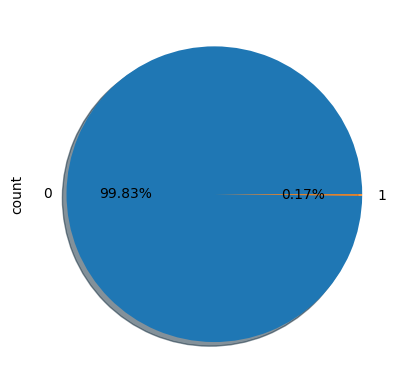

In [26]:
df["Class"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

In [27]:
fraud = df[df['Class']==1]
legit = df[df['Class']==0]

In [28]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [30]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [31]:
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [36]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

 Compare the values of both transanctions

In [42]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Undersampling

The data is highly imbalanced.
Build a sample dataset containing similar distribution of legit and fraud transanctions.

In [45]:
legit_sample = legit.sample(n=473)

Concatenate two dataframes

In [48]:
new_df = pd.concat([legit_sample,fraud],axis=0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68487,53012.0,1.309001,-1.404931,0.820171,-1.384540,-1.852822,-0.138724,-1.454007,0.191398,-1.688938,...,0.045410,0.378172,0.016776,0.196903,0.151426,-0.104770,0.047973,0.021114,58.00,0
32161,36665.0,-0.662345,1.163925,0.897344,0.771585,-0.029598,0.019656,0.362019,0.541061,-1.085339,...,0.292581,0.714015,-0.033307,0.027784,-0.330330,-0.320662,0.051384,0.089982,34.00,0
129323,79042.0,-2.473807,1.365769,-0.450303,0.964920,-0.301428,-0.620497,0.331880,-0.133779,0.334593,...,0.089940,0.297753,-0.131903,0.103753,-0.442978,0.441539,-1.937180,-0.138372,30.67,0
175016,122165.0,1.421506,-2.601008,-2.012687,-1.398274,-1.178477,-0.751248,-0.028721,-0.416887,-2.052400,...,0.005115,-0.637635,-0.157361,-0.414305,-0.344823,-0.356491,-0.109897,0.009246,475.70,0
202719,134458.0,-0.322097,1.031961,-0.192094,-0.730763,0.277618,-0.672610,0.540612,0.399040,-0.418071,...,-0.187640,-0.547133,0.085092,-0.350295,-0.458302,0.143709,0.114816,0.020871,7.67,0


In [50]:
new_df.shape

(946, 31)

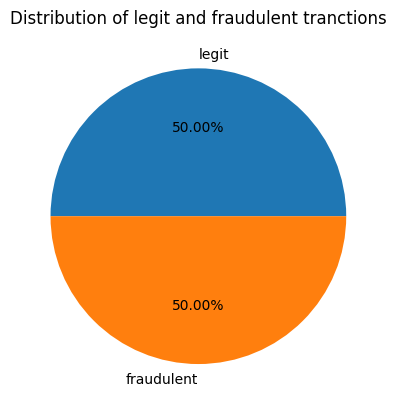

In [52]:
new_df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [54]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Mean of the data before and after undersampling are similar, so we can conclude that our sample selection is right

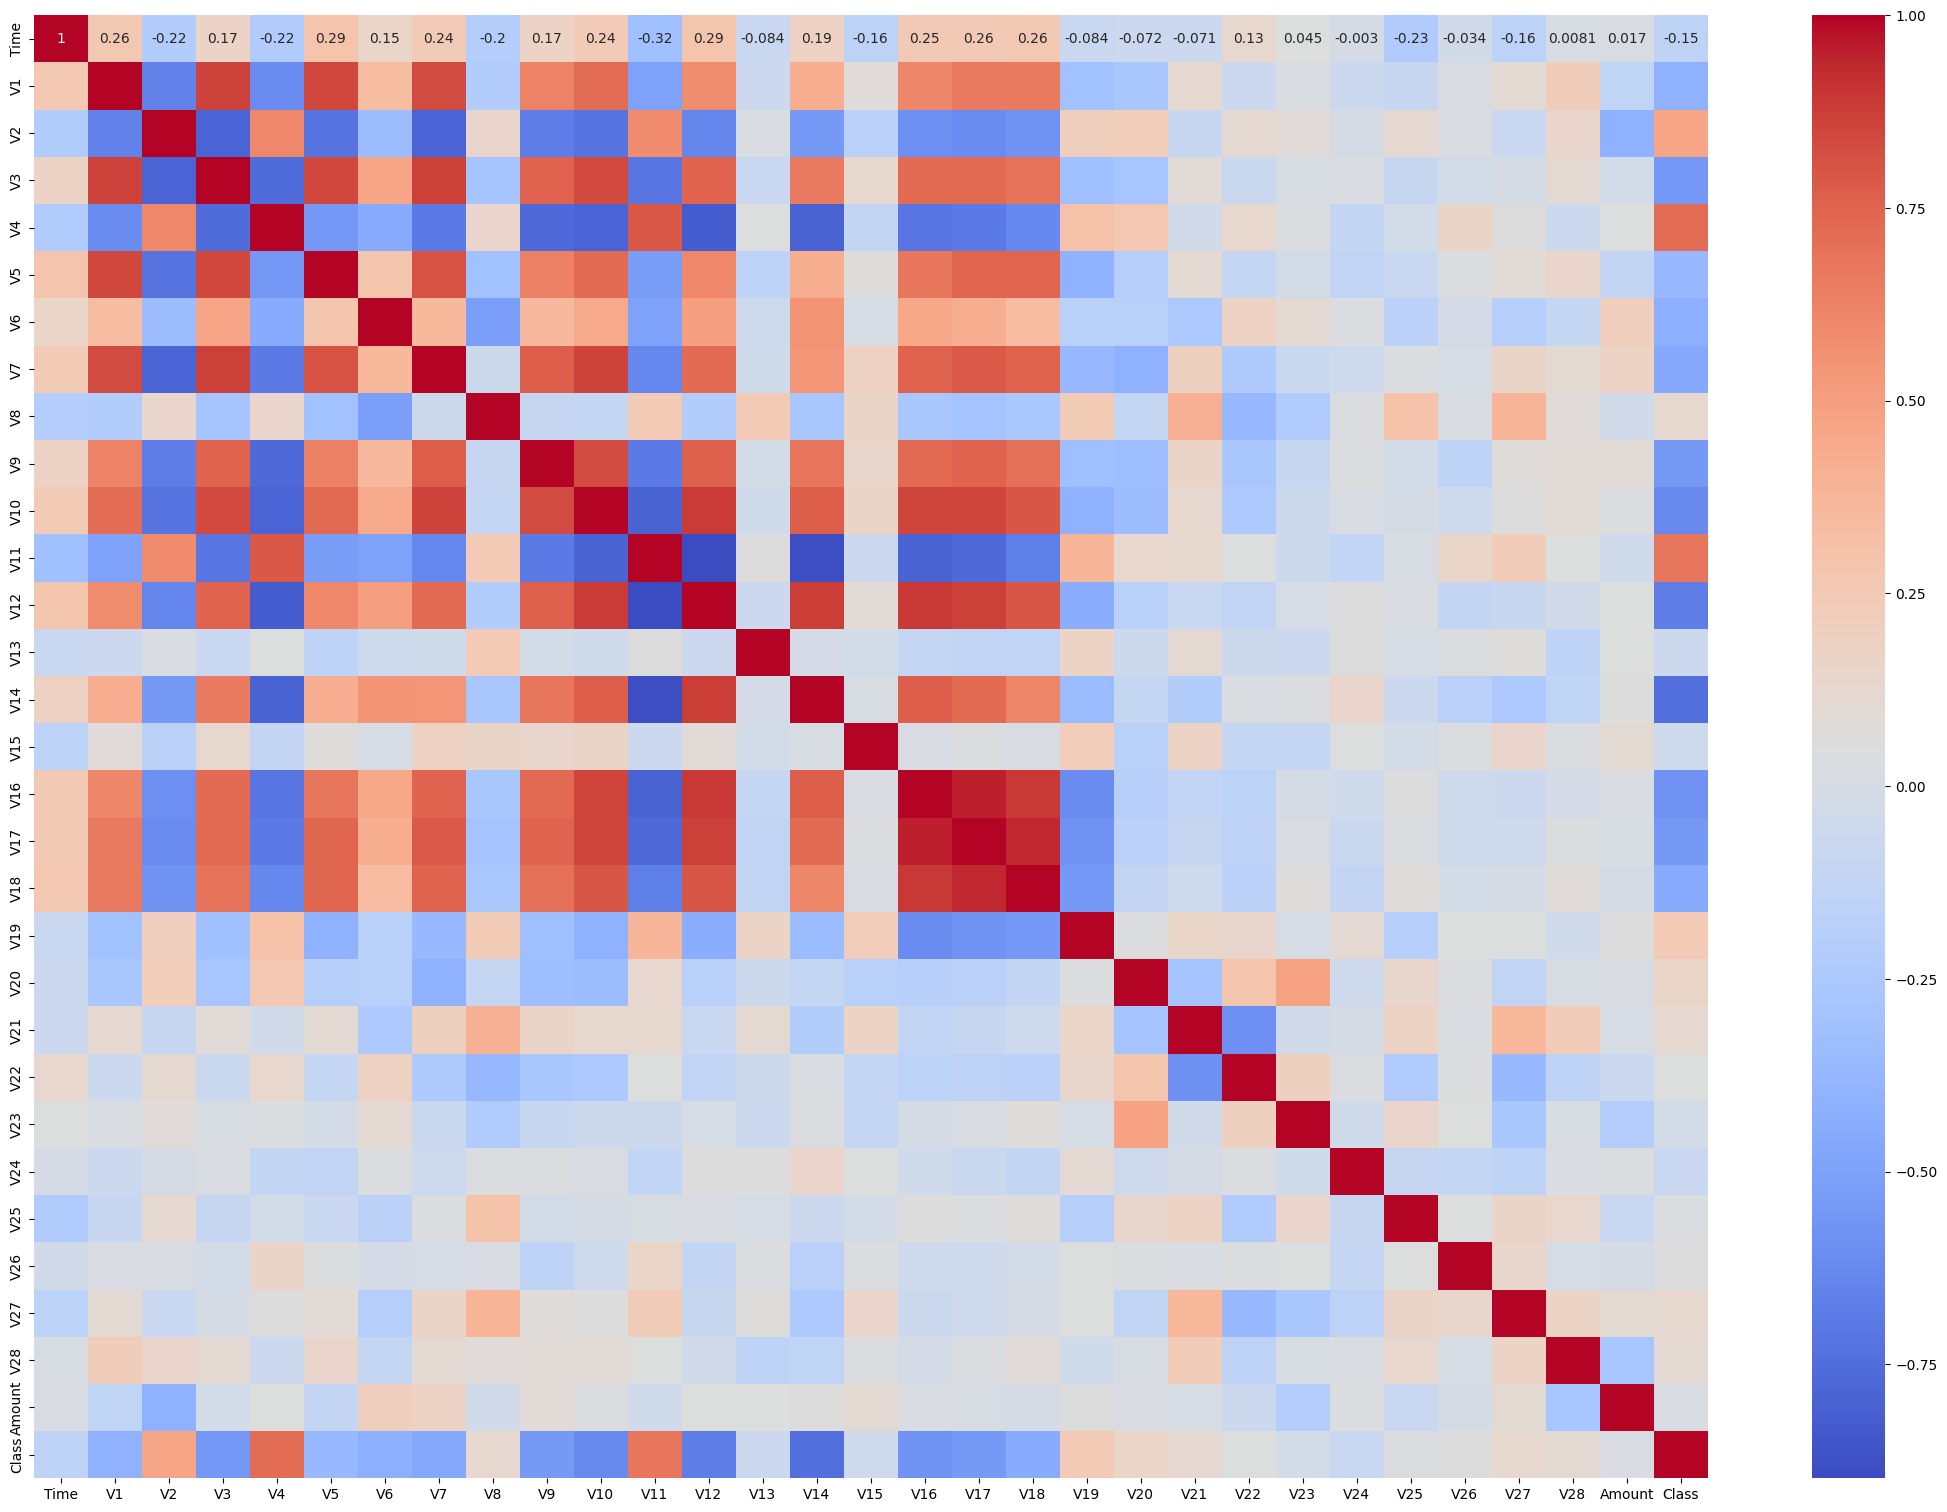

In [57]:
# Plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(new_df.corr(), cmap = 'coolwarm', annot= True )
plt.show()

Split the data into features and target

In [60]:
x = new_df.drop(columns='Class',axis=1)
y = new_df['Class']

In [62]:
y

68487     0
32161     0
129323    0
175016    0
202719    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

In [64]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68487,53012.0,1.309001,-1.404931,0.820171,-1.384540,-1.852822,-0.138724,-1.454007,0.191398,-1.688938,...,-0.333589,0.045410,0.378172,0.016776,0.196903,0.151426,-0.104770,0.047973,0.021114,58.00
32161,36665.0,-0.662345,1.163925,0.897344,0.771585,-0.029598,0.019656,0.362019,0.541061,-1.085339,...,-0.088721,0.292581,0.714015,-0.033307,0.027784,-0.330330,-0.320662,0.051384,0.089982,34.00
129323,79042.0,-2.473807,1.365769,-0.450303,0.964920,-0.301428,-0.620497,0.331880,-0.133779,0.334593,...,-0.507039,0.089940,0.297753,-0.131903,0.103753,-0.442978,0.441539,-1.937180,-0.138372,30.67
175016,122165.0,1.421506,-2.601008,-2.012687,-1.398274,-1.178477,-0.751248,-0.028721,-0.416887,-2.052400,...,0.513498,0.005115,-0.637635,-0.157361,-0.414305,-0.344823,-0.356491,-0.109897,0.009246,475.70
202719,134458.0,-0.322097,1.031961,-0.192094,-0.730763,0.277618,-0.672610,0.540612,0.399040,-0.418071,...,-0.131912,-0.187640,-0.547133,0.085092,-0.350295,-0.458302,0.143709,0.114816,0.020871,7.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


# Split the dataset into training and testing sets

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y,random_state=42)

# Model Training

In [70]:
model = LogisticRegression(max_iter=200)

Training the Logistic Regression model with train data

In [73]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

# Model evaluation

Accuracy of train data

In [77]:
y_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred,y_train)
print("Accuracy of training data:", training_data_accuracy*100,"%")

Accuracy of training data: 94.31216931216932 %


Accuracy of test data

In [80]:
y_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test_pred,y_test)
print("Accuracy of test data:",test_data_accuracy*100,"%")

Accuracy of test data: 93.6842105263158 %


Plot the accuracy of train and test data

C:\Users\Zimm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


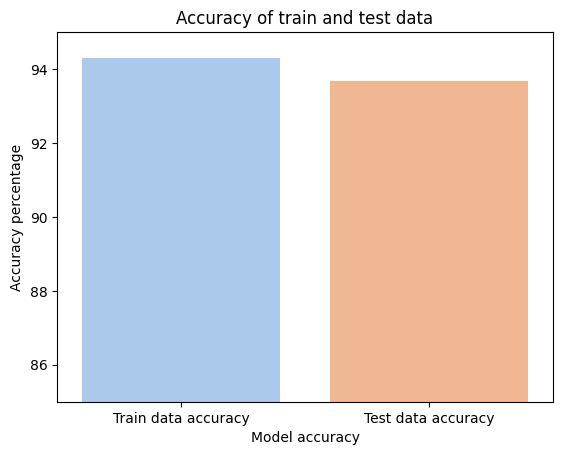

In [83]:
sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')
plt.title("Accuracy of train and test data")
plt.ylim(85,95)
plt.xlabel("Model accuracy")
plt.ylabel("Accuracy percentage")
plt.show()

# Confusion matrix

[[90  5]
 [ 7 88]]


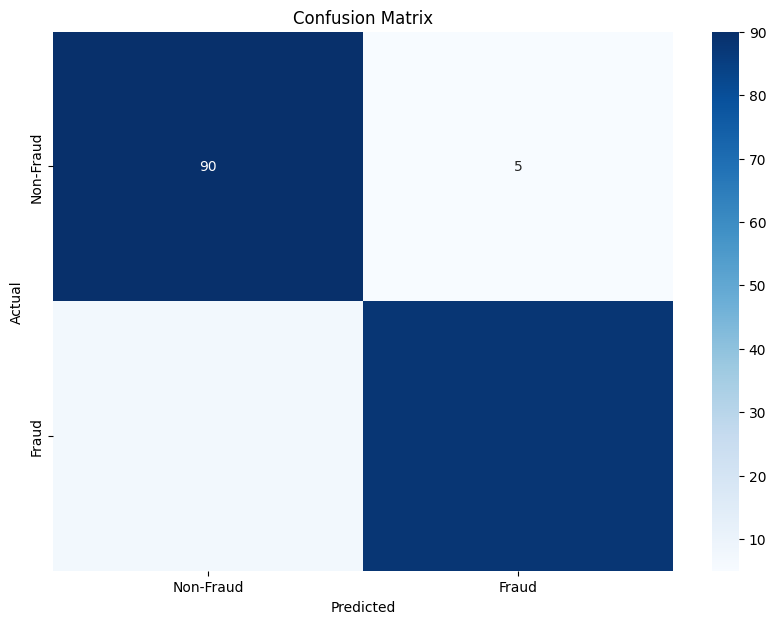

In [86]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification report

In [89]:
print("Classification report:\n",classification_report(y_test,y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.95      0.93      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



# Conclusion

- Data Imbalance
The dataset exhibited significant imbalance, with fraudulent transactions being much rarer compared to legitimate ones. This imbalance poses a challenge for modeling as it can bias the results towards the majority class (legitimate transactions).

- Transaction Amounts
I observed that the mean transaction amount is higher in fraud cases than in legitimate cases. This suggests that fraudulent transactions tend to involve larger sums of money, which could be an important feature in detecting fraud.

- Data Handling
To address the imbalance, I employed Synthetic Minority Over-sampling Technique (SMOTE) to oversample the fraudulent transactions. This approach was used to balance the dataset and improve the model's ability to detect fraudulent transactions.

- Model Selection
I utilized a logistic regression model for this classification task. Logistic regression was chosen for its simplicity and effectiveness in binary classification problems.

- Model Performance
The performance of the logistic regression model was evaluated using various metrics:

- Precision: Measures the proportion of correctly identified fraudulent transactions out of all transactions identified as fraudulent.
- Recall: Measures the proportion of correctly identified fraudulent transactions out of all actual fraudulent transactions.
- F1-Score: The harmonic mean of precision and recall, providing a single metric to evaluate the model's performance.
- Confusion Matrix: Visual representation of true positives, true negatives, false positives, and false negatives.
- The logistic regression model, combined with SMOTE, effectively distinguished between fraudulent and legitimate transactions, achieving balanced
  performance metrics.


Below are the key performance metrics:


- F1-Score: 94%
- Training Data Accuracy: 94.31%
- Test Data Accuracy: 93.68


The confusion matrix also showed a balanced distribution of true positives and true negatives, indicating that the model was able to correctly identify both fraudulent and non-fraudulent transactions.